In [1]:
import numpy as  np
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

(120, 160, 3)


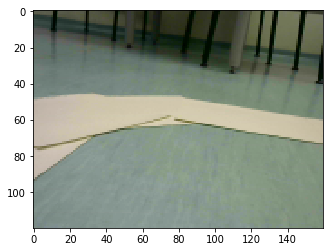

In [2]:
img = cv2.imread('images/right.png')
img2 = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
print(img2.shape)
img2 = img2.reshape((120,160,3))
plt.imshow(img2)

## Escolhendo threshold para a pista

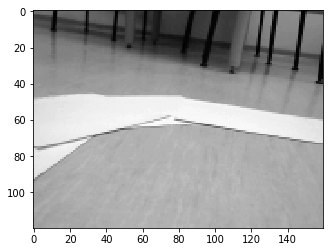

In [3]:
gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(gray_img, cmap="gray")

In [4]:
def adjust_gamma(image, gamma=1.0):

   invGamma = 1.0 / gamma
   table = np.array([((i / 255.0) ** invGamma) * 255
      for i in np.arange(0, 256)]).astype("uint8")

   return cv2.LUT(image, table)

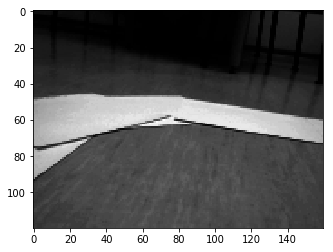

In [5]:
gamma = 0.3
img_gamma = adjust_gamma(gray_img, gamma=gamma)
plt.imshow(img_gamma, cmap='gray')

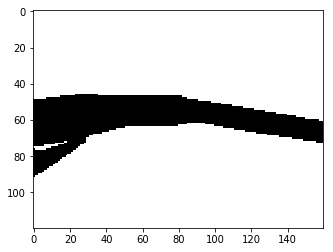

In [6]:
blur = cv2.GaussianBlur(img_gamma, (5,5), 0)
_, bin_img = cv2.threshold(blur,
                           177,
                           255,
                           cv2.THRESH_BINARY + cv2.THRESH_OTSU)
plt.imshow(bin_img, cmap='binary')

### Testing binarize_image() function of image_manipulation.py script

In [7]:
import os, sys
from pathlib import Path
path_current_dir = Path(os.getcwd())
one_level_up = path_current_dir.parents[0]
parent_dir = os.path.join(str(one_level_up), "data_manipulation")
sys.path.append(str(parent_dir))
from image_manipulation import binarize_image # file located in ../data_manipulation/image_manipulation.py

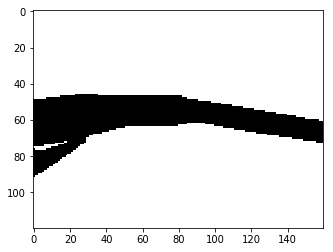

In [8]:
binarized_img = binarize_image(img)
plt.imshow(binarized_img, cmap='binary')